#Introduction

intro paragraph

#Data

##Imports

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
hr_data=pd.read_csv('/content/Drive/My Drive/hr-data.csv',low_memory=False)

##Exploratory Data Analysis

In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   churn                  14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   sales                  14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [5]:
hr_data.size

164989

In [6]:
hr_data

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
hr_data.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
churn                    0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
hr_data.nunique()

id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
churn                        2
promotion_last_5years        2
sales                       10
salary                       3
dtype: int64

In [0]:
#types of variables
categorical_variables = [
    'number_project',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
    'sales'
    'salary'
]

numerical_variables = [
    'satisfaction_level',
    'last_evaluation',
    'average_montly_hours'
]

target = ['churn']


In [10]:
hr_data_dm=pd.get_dummies(hr_data, columns=['sales','salary'])
hr_data_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   churn                  14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   sales_IT               14999 non-null  uint8  
 10  sales_RandD            14999 non-null  uint8  
 11  sales_accounting       14999 non-null  uint8  
 12  sales_hr               14999 non-null  uint8  
 13  sales_management       14999 non-null  uint8  
 14  sales_marketing        14999 non-null  uint8  
 15  sa

Create a new dataframe for dummy variables to be applied.

In [11]:
hr_data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [12]:
hr_data['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [13]:
hr_data['churn'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

The percentage in people churning from the Company is 23.8%. Whereas the ones who stayed are 76.2%. 

In [14]:
hr_data.groupby('churn').mean()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
churn,,,,,,,,
0,7811.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,6499.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here are my observations:

- The average satisfaction level of the employees of the ones who did not churn are higher than the ones who did. 
- The number of times employees have been promoted in the last 5 years are higher than the ones who did. 
- The mean of average monthly hours are shorter for the ones who stayed compared to the ones who left but not by a lot.
- There are more work accidents for the ones who stayed.
- The average of last evaluation, number project and time spend company are very close to each other.

In [15]:
hr_data.groupby('sales').mean()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
sales,,,,,,,,,
IT,7655.845966,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,6777.346887,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,7255.035202,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,7035.889039,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,9438.363492,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,7750.684149,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,8095.417960,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,7675.873430,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,7211.809780,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [16]:
hr_data.groupby('salary').mean()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
salary,,,,,,,,,
high,8621.897332,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,7326.897622,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,7478.844400,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


###Data visualization

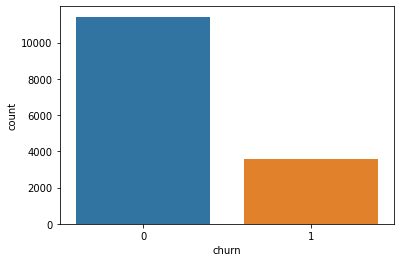

In [17]:
sb.countplot(x='churn',data=hr_data)
plt.show()

In [0]:
def bar_graph(column):
  pd.crosstab(hr_data[column], hr_data['churn']).plot(kind='bar')
  plt.title('Churn type frequency for '+column)
  plt.xlabel(column)
  plt.ylabel('Fequency of Churns')
  return

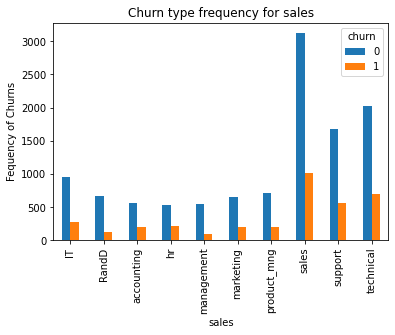

In [94]:
bar_graph('sales')

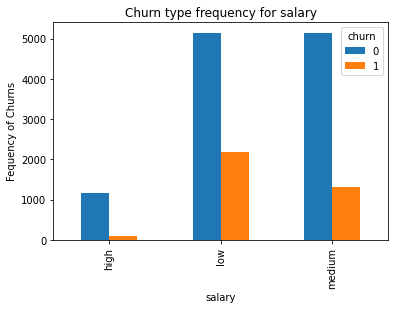

In [95]:
bar_graph('salary')

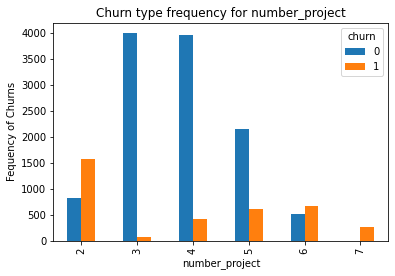

In [96]:
bar_graph('number_project')

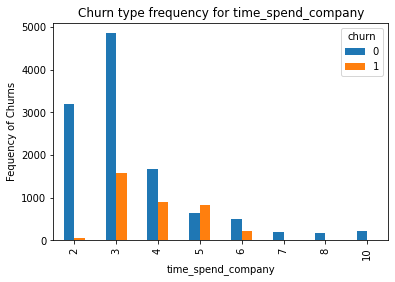

In [97]:
bar_graph('time_spend_company')

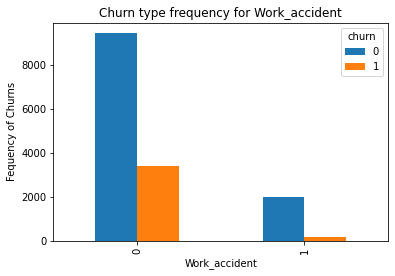

In [98]:
bar_graph('Work_accident')

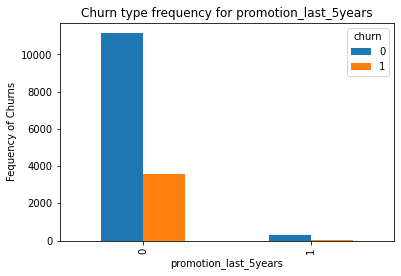

In [99]:
bar_graph('promotion_last_5years')

In [0]:
def continous_graph(column):
  fig, axs = plt.subplots(2,2,figsize=(10,10))
  sb.distplot(hr_data.loc[hr_data['churn']==0,'satisfaction_level'],bins=10, label='0', ax=axs[0][0])
  sb.distplot(hr_data.loc[hr_data['churn']==1,'satisfaction_level'],bins=10, label='1',ax=axs[0][0])
  sb.boxplot(x='satisfaction_level', data=hr_data,ax=axs[0][1])
  sb.boxplot(x='satisfaction_level', data=hr_data.loc[hr_data['churn']==1, :],ax=axs[1][0])
  sb.boxplot(x='satisfaction_level', data=hr_data.loc[hr_data['churn']==0, :],ax=axs[1][1])
  return

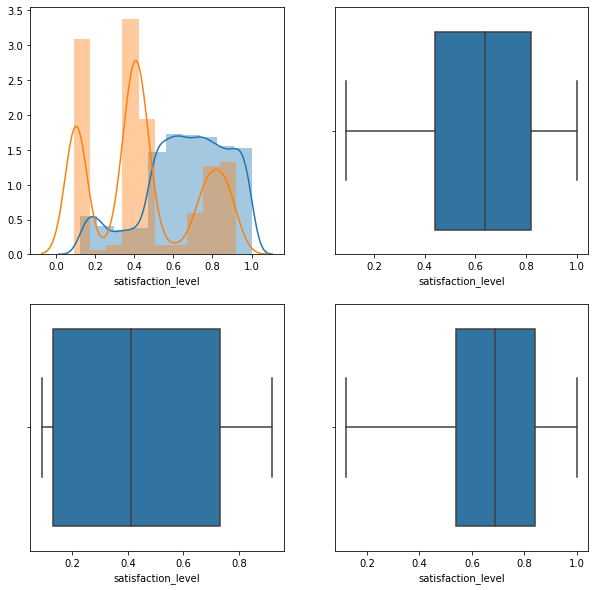

In [87]:
continous_graph('satisfaction_level')

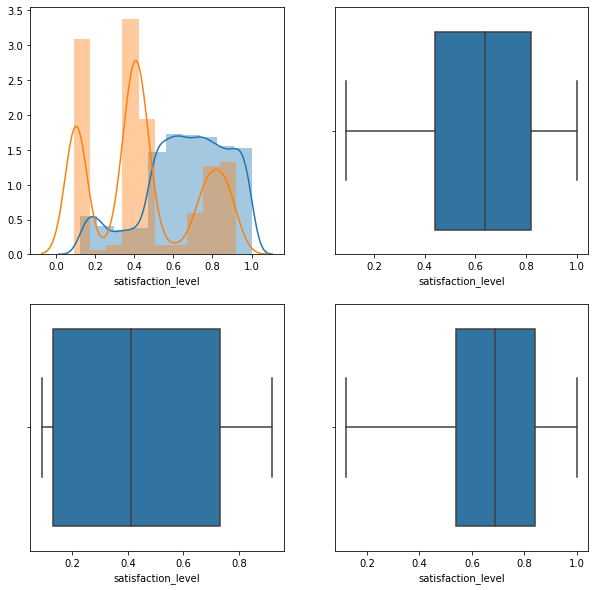

In [88]:
continous_graph('last_evaluation')

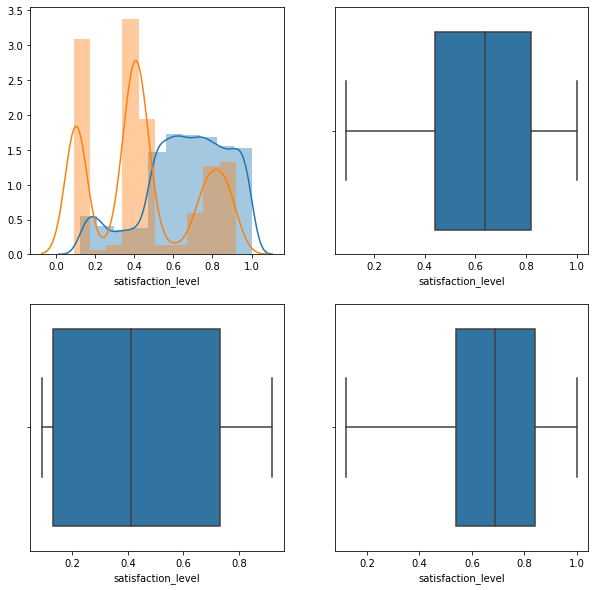

In [90]:
continous_graph('average_montly_hours')

##Modeling

In [27]:
hr_data_dm.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [0]:
x_variables=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium']

In [0]:
x = hr_data_dm[x_variables]
y = hr_data_dm['churn']

In [0]:
#feature selection
logreg=LogisticRegression(penalty='none',solver='lbfgs',verbose=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [34]:
x_train.shape

(11999, 20)

In [35]:
logreg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [0]:
x_train_scaler=StandardScaler()

#fit scaler
x_train_scaler.fit(x_train)

#transform the data
x_train_scaled = x_train_scaler.transform(x_train)

In [37]:
logreg.fit(x_train_scaled,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [38]:
coef=logreg.coef_
coef

array([[-1.04201863,  0.11407237, -0.38544566,  0.25025097,  0.39304588,
        -0.53431387, -0.20692624, -0.02904122, -0.14010618,  0.01122554,
         0.06904565, -0.07918959,  0.02121624, -0.00450201,  0.00824295,
         0.02786085,  0.05296531, -0.41920111,  0.24135083, -0.01133905]])

In [39]:
x_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

We'll use any coefficients greater than 0.10. So that leaves us with the following variables
- satisfaction_level
- last_evaluation
- number_project
- average_monthly_hours
- time_spend_company
- work_accident
- promotion_last_5years
- sales_RandD
- salary_high
- salary_low.

In [0]:
x_variables_feature=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'salary_high',
       'salary_low']

In [0]:
x2=hr_data_dm[x_variables_feature]
y2=hr_data_dm['churn']

In [0]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [0]:
x2_train_scaler=StandardScaler()

#fit scaler
x2_train_scaler.fit(x2_train)

#transform the data
x2_train_scaled = x2_train_scaler.transform(x2_train)

In [0]:
logreg2 = LogisticRegression(penalty='none',solver='lbfgs',verbose=1)

In [45]:
logreg2.fit(x2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [73]:
y2_pred = logreg2.predict(x2_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(x2_test, y2_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [103]:
logreg2.classes_

array([0, 1])

In [101]:
logreg2.predict_proba(x2_train)

array([[0.90912836, 0.09087164],
       [0.68806533, 0.31193467],
       [0.95814735, 0.04185265],
       ...,
       [0.89412331, 0.10587669],
       [0.75223744, 0.24776256],
       [0.83454597, 0.16545403]])

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.34      0.42       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.76      0.79      0.76      3000



In [82]:
confusion_matrix(y2_train.tolist(),y2_pred.tolist())

TypeError: ignored